In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Define features and target
X = df.drop(columns=['Target'])  # replace 'target_column' with your actual target column name
y = df['Target']

# Split the data (train 65%, validate 20%, test 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 of 35% ≈ 15%

# Initialize and train Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)

# Predict and evaluate on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate metrics for validation set
r2_val = round(r2_score(y_val, y_val_pred), 2)
mae_val = round(mean_absolute_error(y_val, y_val_pred), 2)
medae_val = round(median_absolute_error(y_val, y_val_pred), 2)

# Calculate metrics for test set
r2_test = round(r2_score(y_test, y_test_pred), 2)
mae_test = round(mean_absolute_error(y_test, y_test_pred), 2)
medae_test = round(median_absolute_error(y_test, y_test_pred), 2)

# Display results
print("Validation Set - R²:", r2_val, ", MAE:", mae_val, ", MedAE:", medae_val)
print("Test Set - R²:", r2_test, ", MAE:", mae_test, ", MedAE:", medae_test)

Validation Set - R²: -0.04 , MAE: 201.39 , MedAE: 202.49
Test Set - R²: 0.06 , MAE: 206.84 , MedAE: 220.41


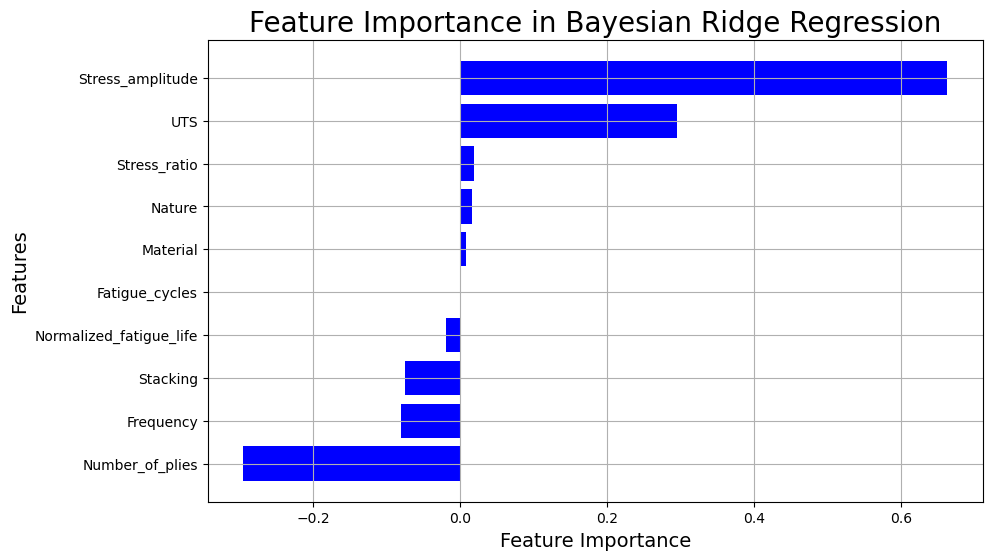

In [3]:
import matplotlib.pyplot as plt

# Get absolute values of coefficients and sort by importance
feature_importance = model.coef_
features = X.columns
sorted_idx = np.argsort(feature_importance)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], color='blue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in Bayesian Ridge Regression", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('BRR.tiff')

# Show plot
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Define features and target
X = df.drop(columns=['Target'])  # replace 'target_column' with your actual target column name
y = df['Target']

# Split the data (train 65%, validate 20%, test 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 of 35% ≈ 15%

# Parameter grid for GridSearchCV
param_grid = {
    'tol': [1e-3, 1e-4, 1e-5],
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

# Set up GridSearchCV with 5-fold cross-validation
brr_gs = GridSearchCV(BayesianRidge(), param_grid, cv=5, scoring='r2', n_jobs=-1)
brr_gs.fit(X_train, y_train)

# Best parameters and cross-validation R²
best_params = brr_gs.best_params_
cv_r2 = round(brr_gs.best_score_, 2)

print("Best Parameters:", best_params)
print("Cross-Validation R²:", cv_r2)

# Model with best parameters
model = brr_gs.best_estimator_

# Predict and evaluate on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred_gs = model.predict(X_test)

# Calculate metrics for validation set
r2_val = round(r2_score(y_val, y_val_pred), 2)
mae_val = round(mean_absolute_error(y_val, y_val_pred), 2)
medae_val = round(median_absolute_error(y_val, y_val_pred), 2)

# Calculate metrics for test set
r2_test = round(r2_score(y_test, y_test_pred_gs), 2)
mae_test = round(mean_absolute_error(y_test, y_test_pred_gs), 2)
medae_test = round(median_absolute_error(y_test, y_test_pred_gs), 2)

# Display results
print("Validation Set - R²:", r2_val, ", MAE:", mae_val, ", MedAE:", medae_val)
print("Test Set - R²:", r2_test, ", MAE:", mae_test, ", MedAE:", medae_test)

Best Parameters: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'tol': 0.001}
Cross-Validation R²: 0.05
Validation Set - R²: -0.04 , MAE: 201.39 , MedAE: 202.49
Test Set - R²: 0.06 , MAE: 206.84 , MedAE: 220.41


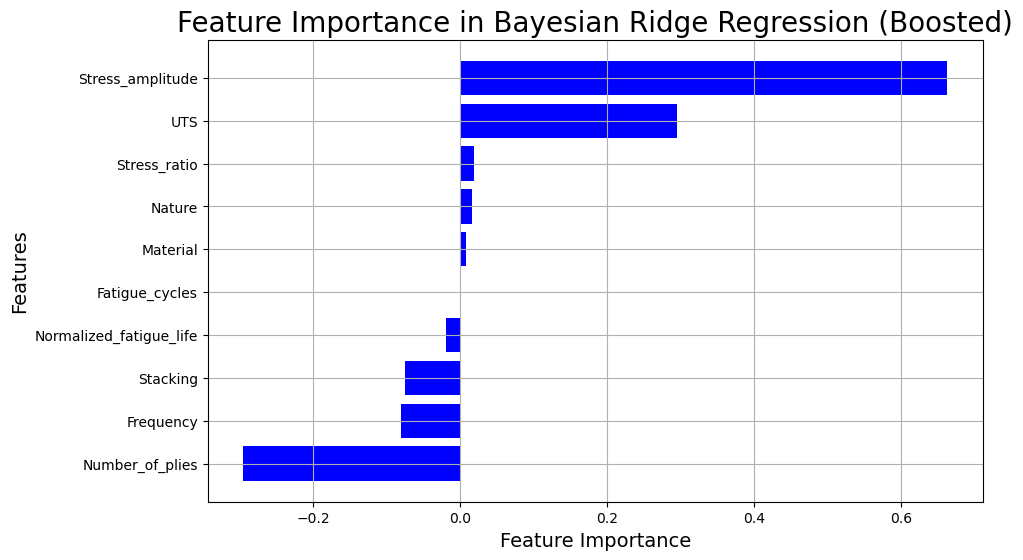

In [4]:
import matplotlib.pyplot as plt

# Get absolute values of coefficients and sort by importance
feature_importance = model.coef_
features = X.columns
sorted_idx = np.argsort(feature_importance)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], color='blue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in Bayesian Ridge Regression (Boosted)", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('BRR GS.tiff')

# Show plot
plt.show()

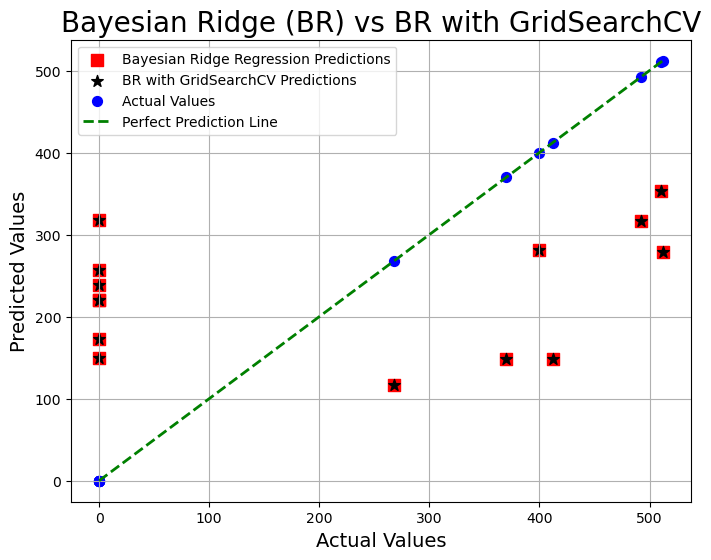

In [12]:
# Set figure size
plt.figure(figsize=(8, 6))

# Actual vs RR predictions (Square markers, blue color)
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="Bayesian Ridge Regression Predictions")

# Actual vs RR_GridSearchCV predictions (Triangle markers, orange color)
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="BR with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("Bayesian Ridge (BR) vs BR with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('BRR vs BRR with gridserach.tiff')

# Show plot
plt.show()